<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Proyecto 02: Free Style

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_projectYY_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Daniela Paz Díaz Mora

__Rol__: 201710003-6

## Prediciendo _Pulsars_

Un púlsar (del acrónimo en inglés de pulsating star, que significa «estrella que emite radiación muy intensa a intervalos cortos y regulares») es una estrella de neutrones que emite radiación periódica. Los púlsares poseen un intenso campo magnético que induce la emisión de estos pulsos de radiación electromagnética a intervalos regulares relacionados con el periodo de rotación del objeto. [Wikipedia](https://es.wikipedia.org/wiki/P%C3%BAlsar).

![pulsar](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Chandra-crab.jpg/600px-Chandra-crab.jpg)

_A composite image of the Crab Nebula showing the X-ray (blue), and optical (red) images superimposed. The size of the X-ray image is smaller because the higher energy X-ray emitting electrons radiate away their energy more quickly than the lower energy optically emitting electrons as they move._

### Descripción de los datos

In [1]:
!cat data/Readme.txt

******************************************************************************************

# HTRU2

Author: Rob Lyon, School of Computer Science & Jodrell Bank Centre for Astrophysics,
		University of Manchester, Kilburn Building, Oxford Road, Manchester M13 9PL.

Contact:	rob@scienceguyrob.com or robert.lyon@.manchester.ac.uk
Web:		http://www.scienceguyrob.com or http://www.cs.manchester.ac.uk
			or alternatively http://www.jb.man.ac.uk
******************************************************************************************

1. Overview

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South) [1]. 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and 

### Objetivo

El objetivo es a partir de los datos, hacer la mejor predicción si un registro es un __pulsar__ o no. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. Sin embargo, se busca escoger el mejor modelo de clasificación con una métrica específica (_precision_).

* Se solicita ajustar tres modelos de clasificación, una regresión logística, KNN y un tercero a elección del siguiente [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Finalmente, realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 

En este informe __siempre__ debes utilizar _score_ / _scoring_ la métrica [_precision_](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score), tanto para el _Cross Validation_, _Hyper Parameter Tuning_ y _Prediction_. Toda la información al respecto de las métricas se encuentra [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions). 

### Evaluación

Este jupyter notebook debe ser autocontenido, considera que es un informe técnico donde debes detallar cada paso, comentando código, utilizando variables con nombres adecuados, realizando gráficos y agregando apreciaciones personales cuando sea necesario. __No escatimes recursos a la hora de escribir.__

__Escenario:__ Te encuentras trabajando como _data scientist / data analyst / machine learning engineer / etc._ y este trabajo será presentado al resto del equipo, en especial a tu jefe directo. Todos tienen conocimiento del problema y de machine learning, por lo que no puedes pasar por alto los aspectos técnicos de tu desarrollo. __Al final del informe, debes entregar tus conclusiones, visualizaciones y apreciaciones personales.__

__Preguntas a responder:__

* ¿Cuál modelo tiene mejor _precision_?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?
* ¿Por qué utilizar _precision_ y no otro score?


### Rúbrica

* __Estadística Descriptiva__ (5 pts)
* __Visualización__ (10 pts)
* __Preprocesamineto__ (5 pts)
* __Regresión Logística__ (10 pts)
* __K Nearest Neighbours__ (15 pts)
* __Modelo a elección__ (15 pts)
* __Selección de Modelos__ (20 pts)
* __Conclusiones__ (20 pts)

## Contenidos

* [Estadística Descriptiva](#descr_stat)
* [Visualización](#visualization)
* [Preprocesamineto](#preprocessing)
* [Regresión Logística](#logistic)
* [K Nearest Neighbours](#knn)
* [Lasso](#free-style)
* [Selección de Modelos](#model-selection)
* [Conclusiones](#conclusions)

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(
    os.path.join("data", "HTRU_2.csv"),
    header=None,
    names=[
        "mean_integrated_profile",
        "std_integrated_profile",
        "excess_kurtosis_integrated_profile",
        "skewness_integrated_profile",
        "mean_dmsnr",
        "std_dmsnr",
        "excess_kurtosis_dmsnr",
        "skewness_dmsnr",
        "is_pulsar",
    ]
)
df.head()

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<a id='descr_stat'></a>

## Estadística Descriptiva

* Dar una pequeña definición de las columnas (_features_).
* Análisis descriptivo.
* Valores atípicos.
* Análisis específico a la variable _target_.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated_profile               17898 non-null float64
std_integrated_profile                17898 non-null float64
excess_kurtosis_integrated_profile    17898 non-null float64
skewness_integrated_profile           17898 non-null float64
mean_dmsnr                            17898 non-null float64
std_dmsnr                             17898 non-null float64
excess_kurtosis_dmsnr                 17898 non-null float64
skewness_dmsnr                        17898 non-null float64
is_pulsar                             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


* Se tiene que trabajaremos con un dataframe de 9 columnas, las primera 8 columnas representan  medidas de resumen de cada registro, y la ultima valores enteros,
* Las primeras 4 primeras columnas se refieren al perfil integrado( que corresponden al perfil unico que tiene el puso)
* Las siguientes 4 se refieren a las  estadisticas DM-SNR ('Dispersion measure' vs 'Signal to Noise Ratio') del pulsar.
* La ultima se refiere a si corresponde a un pulsar o no
* Para cada perfil integrado y DM-SNR se dan dos medidas de tendecia central (promedio y desviación estandar) y dos medidas de forma (curtosis e inclinació de la curva) en ese orden por columna

In [5]:
set(df['is_pulsar'].tolist())
print(df['is_pulsar'].tolist().count(0))
print(df['is_pulsar'].tolist().count(1))

16259
1639


In [6]:
positive_examples=df[df.is_pulsar==1]
positive_examples.describe().drop('count')
list(df)

['mean_integrated_profile',
 'std_integrated_profile',
 'excess_kurtosis_integrated_profile',
 'skewness_integrated_profile',
 'mean_dmsnr',
 'std_dmsnr',
 'excess_kurtosis_dmsnr',
 'skewness_dmsnr',
 'is_pulsar']

In [7]:
negative_examples=df[df.is_pulsar==0]
negative_examples.describe().drop('count')

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr,is_pulsar
mean,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344,0.0
std,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930,0.0
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
25%,105.253906,43.384645,0.008650,-0.221980,1.857023,14.138541,6.615374,47.580165,0.0
50%,117.257812,47.485647,0.186665,0.124107,2.635452,17.618420,8.760010,90.674592,0.0
75%,128.285156,51.315620,0.392892,0.663383,4.227007,24.517386,10.935207,145.827223,0.0
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,0.0


* Por lo tanto se tiene que no hay datos anomalos, es decir todos cumplen la descripcion dada inicialmente

In [8]:
traduccion=['Media del perfil integrado',
'Desviación estándar del perfil integrado.',
'Exceso de curtosis del perfil integrado.',
'Inclinación del perfil integrado.',
'Media de la curva DM-SNR.',
'Desviación estándar de la curva DM-SNR.',
'Exceso de curtosis de la curva DM-SNR.',
'Inclinación de la curva DM-SNR.']
dic_trad=dict(zip(list(df),traduccion));

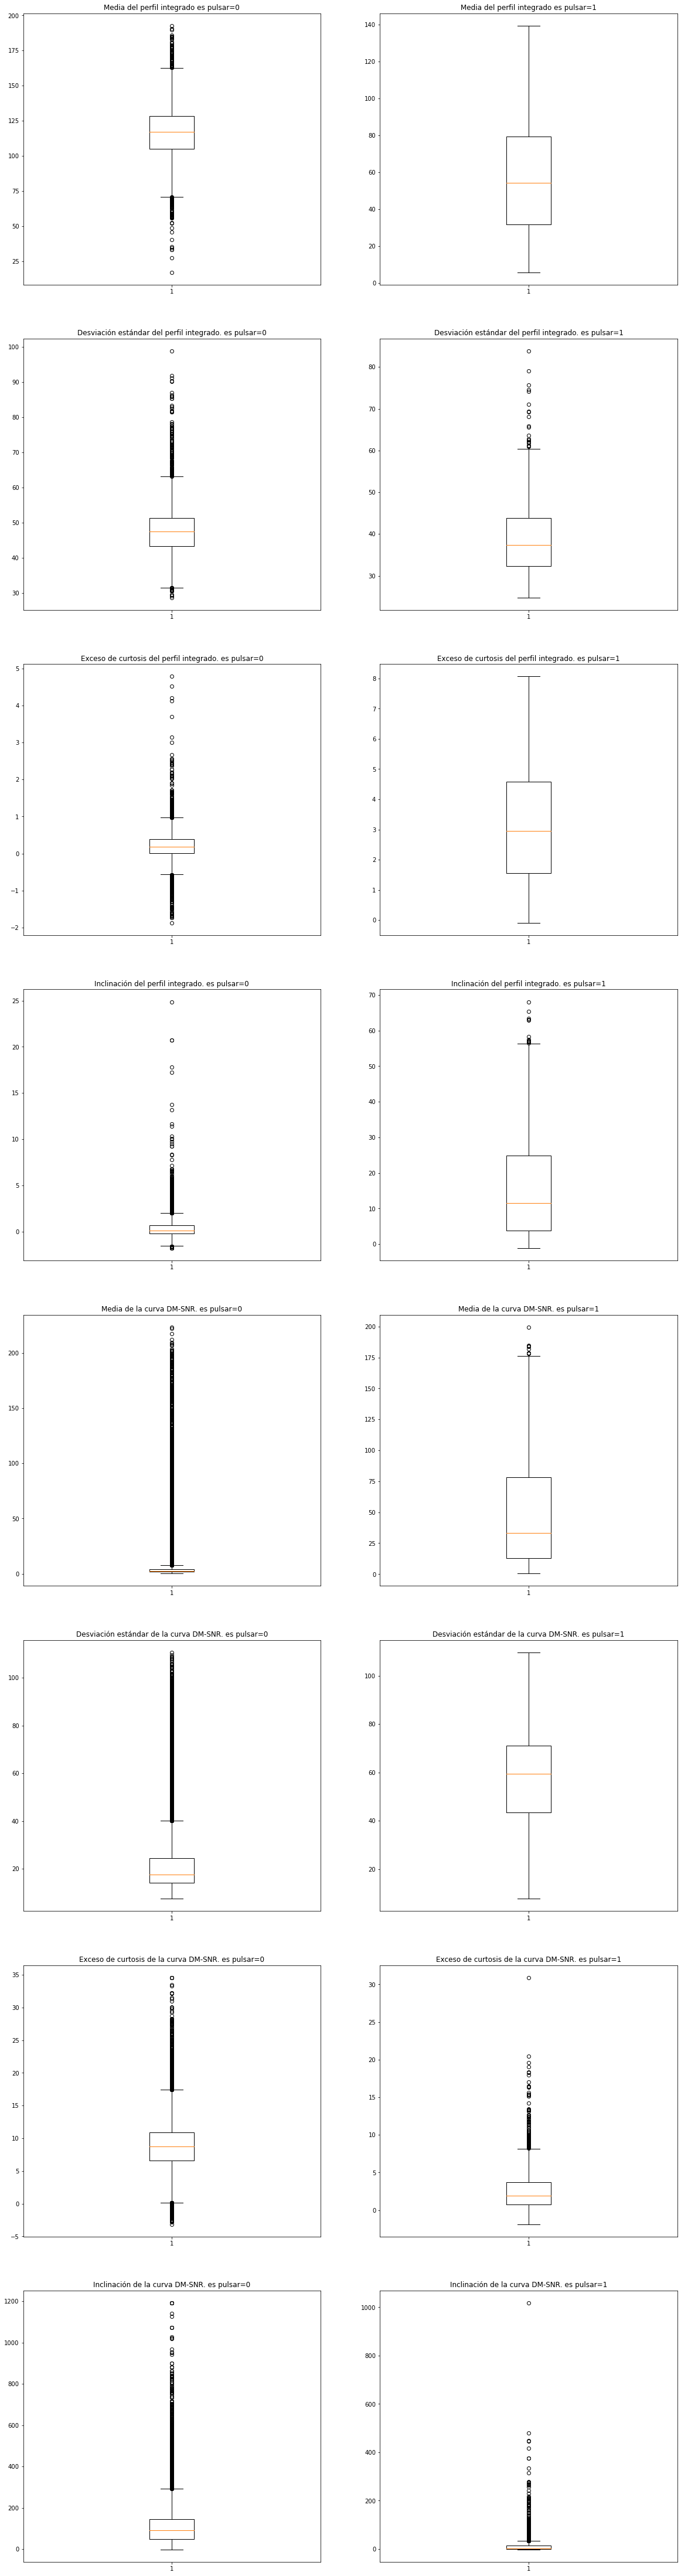

In [9]:
import matplotlib.pyplot as plt


nx,ny=8,2
fig, ax = plt.subplots(nrows=nx, ncols=ny,figsize=(20,80))

for i in np.arange(0,nx):
    for j in np.arange(0,ny):
        index=j+ny*i
        if j==0:
            ax[i,j].boxplot(negative_examples[list(df)[i]])
            ax[i,j].set_title(dic_trad[list(df)[i]]+' es pulsar=0')
        else:
            ax[i,j].boxplot(positive_examples[list(df)[i]])
            ax[i,j].set_title(dic_trad[list(df)[i]]+' es pulsar=1')

* Se ve que en todos los boxplot hay muchos datos atipicos lo cual no es extraño en un datasets de tanto volumen

<a id='visualization'></a>

## Visualización

* Histogramas.
* Scatter matrix coloreando por el _target_.
* Mapa de calor con correlación entre variables.

Puedes utilizar `matplotlib` o `altair`, como sea de tu preferencia.

In [10]:
import altair as alt
import matplotlib.pyplot as plt

alt.themes.enable("opaque")

%matplotlib inline

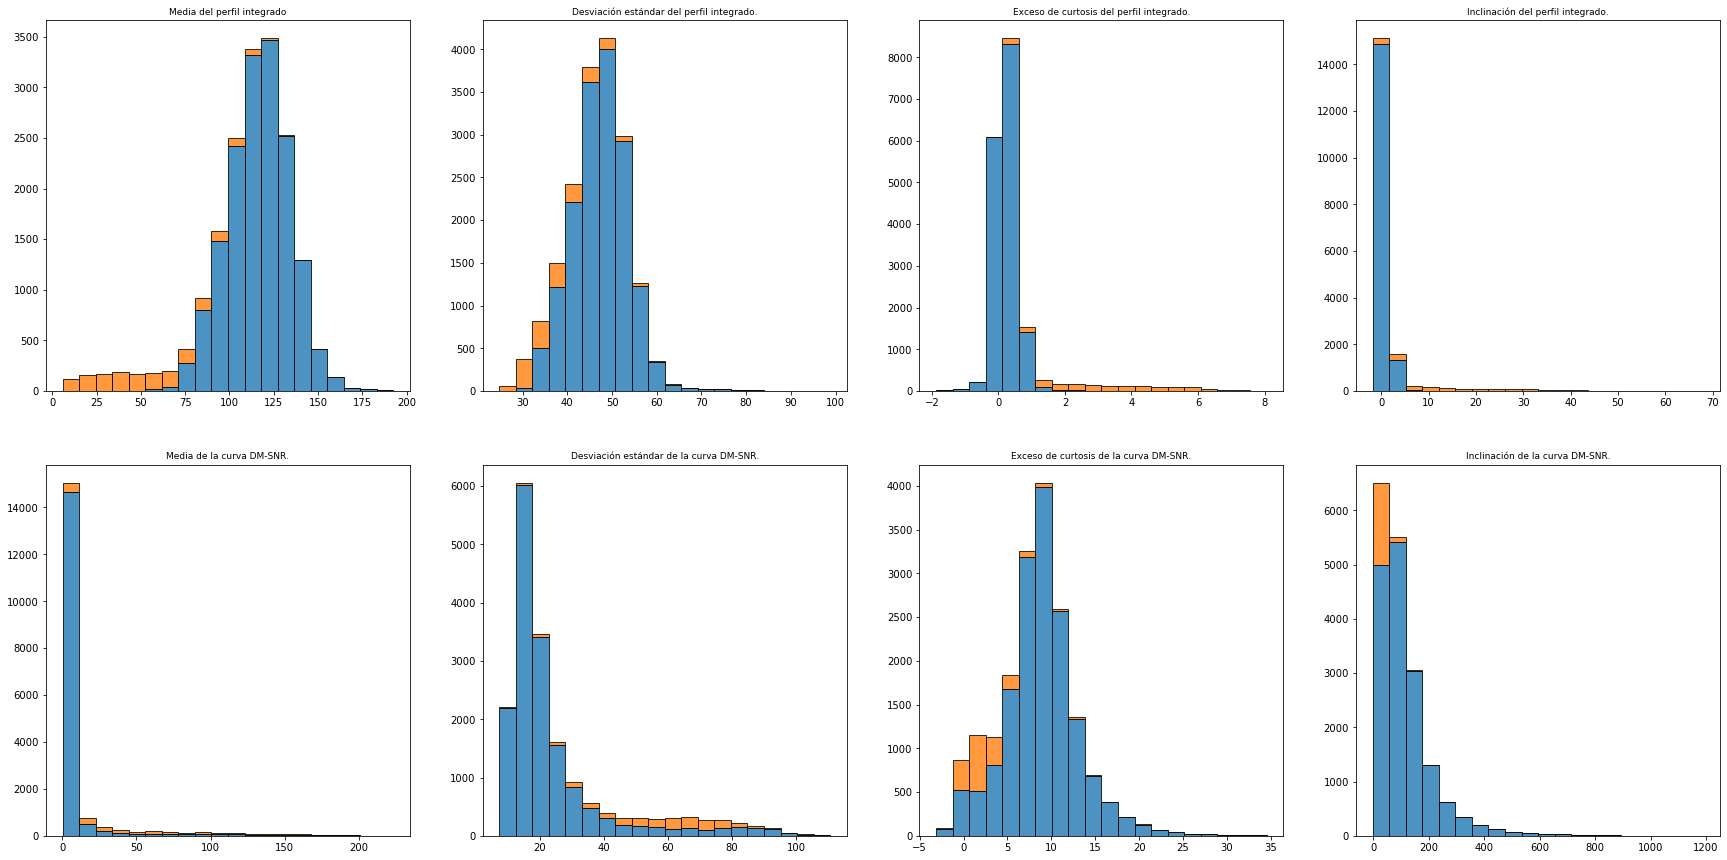

In [11]:
nx,ny=2,4
fig, ax = plt.subplots(nrows=nx, ncols=ny,figsize=(30,15))

for i in np.arange(0,nx):
    for j in np.arange(0,ny):
        index=j+ny*i
        ax[i,j].hist([df[df.is_pulsar==0][list(df)[index]],df[df.is_pulsar==1][list(df)[index]]],bins=20,stacked=True,density=False,alpha=0.8,edgecolor='black')
        ax[i,j].set_title(dic_trad[list(df)[index]],fontsize=9)



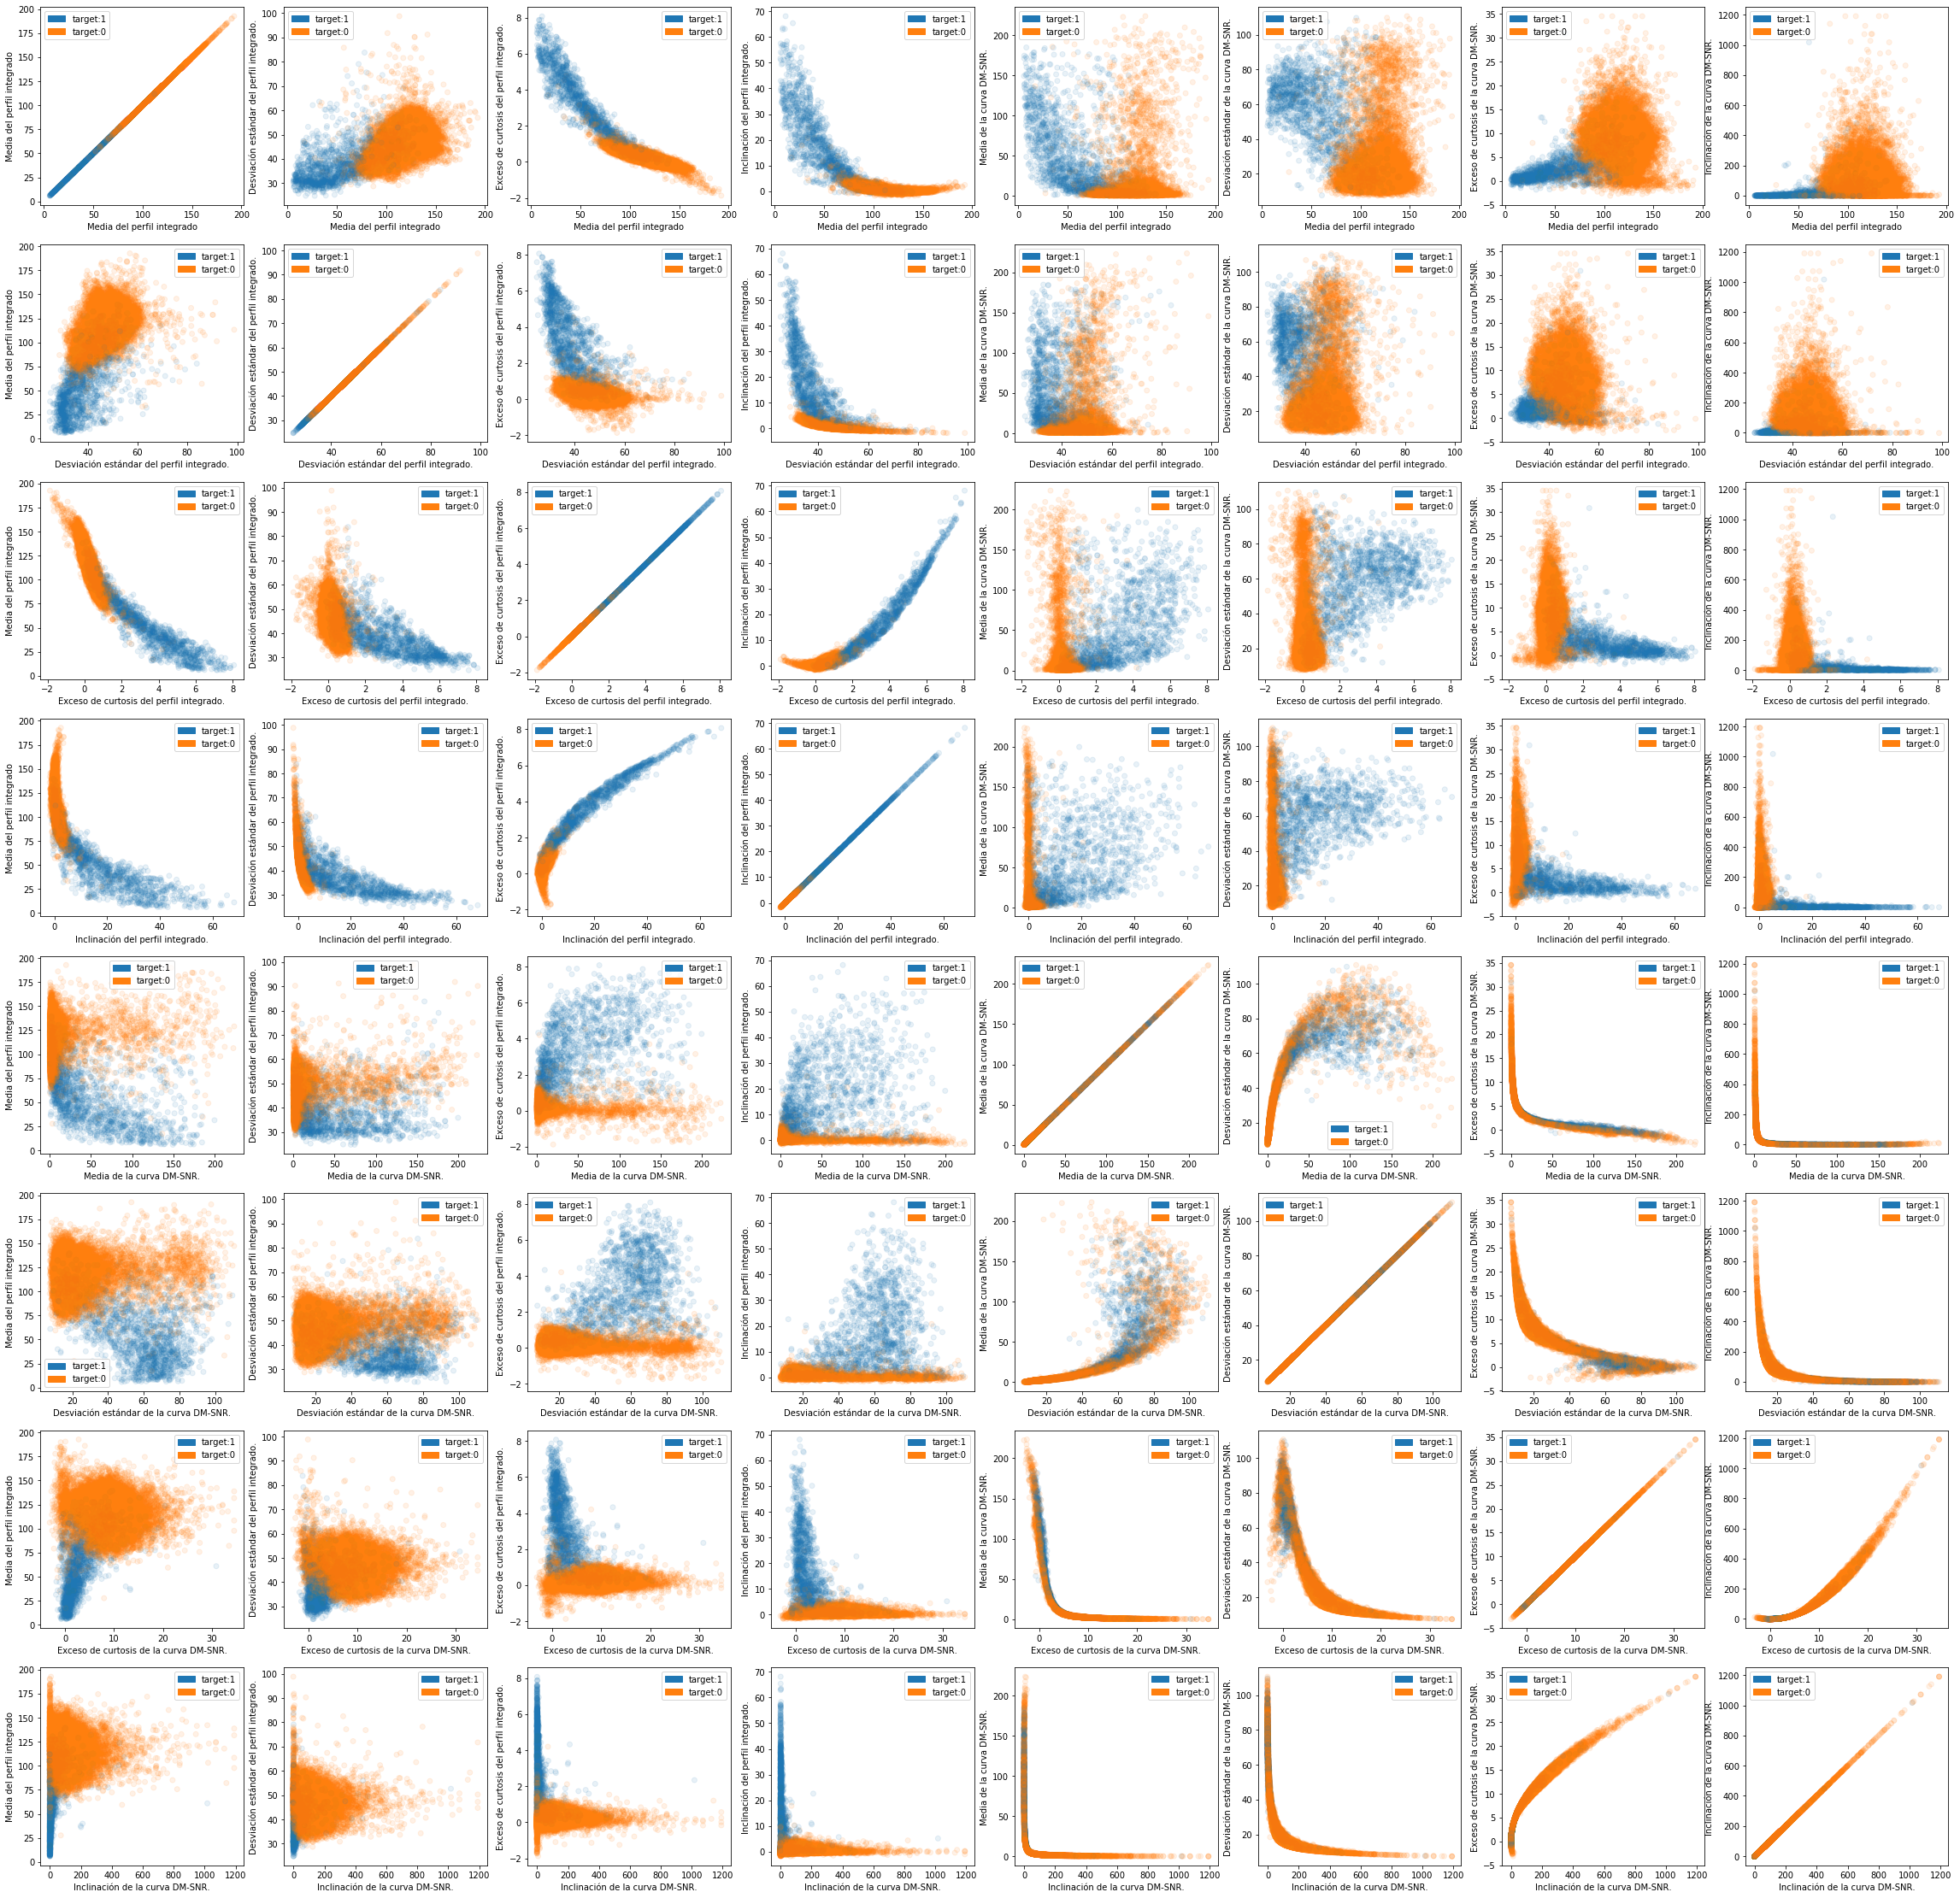

In [12]:
import matplotlib.patches as mpatches

#Sea crea 64 graficos vacios
nx, ny= 8,8
fig, ax = plt.subplots(nrows=nx, ncols=ny,figsize=(40,40))

df_labels=df

#diccionario de color asignado para cada continente
col_dict={1:'tab:blue', 0:'tab:orange'}

#creacion de columna nueva en el df auxiliar correspondiente al color de cada punto
df_labels["colour_column"] = df_labels["is_pulsar"].map(col_dict)


for i in range(nx):
    for j in range(ny):
        index= j+ny*i
        scatter=ax[i,j].scatter(df_labels[list(df)[i]],df_labels[list(df)[j]],c=df_labels['colour_column'],alpha=0.1)
        ax[i,j].set_xlabel(dic_trad[list(df)[i]])
        ax[i,j].set_ylabel(dic_trad[list(df)[j]])
        c1= mpatches.Patch(color='tab:blue', label='target:1')
        c2= mpatches.Patch(color='tab:orange', label='target:0')
        ax[i,j].legend(handles=[c1,c2])

In [13]:
df_matrix=df.drop(['is_pulsar','colour_column'],axis='columns')
corr_matrix=df_matrix.corr(method='pearson').values
df_matrix

,mean_integrated_profile,std_integrated_profile,excess_kurtosis_integrated_profile,skewness_integrated_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skewness_dmsnr
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


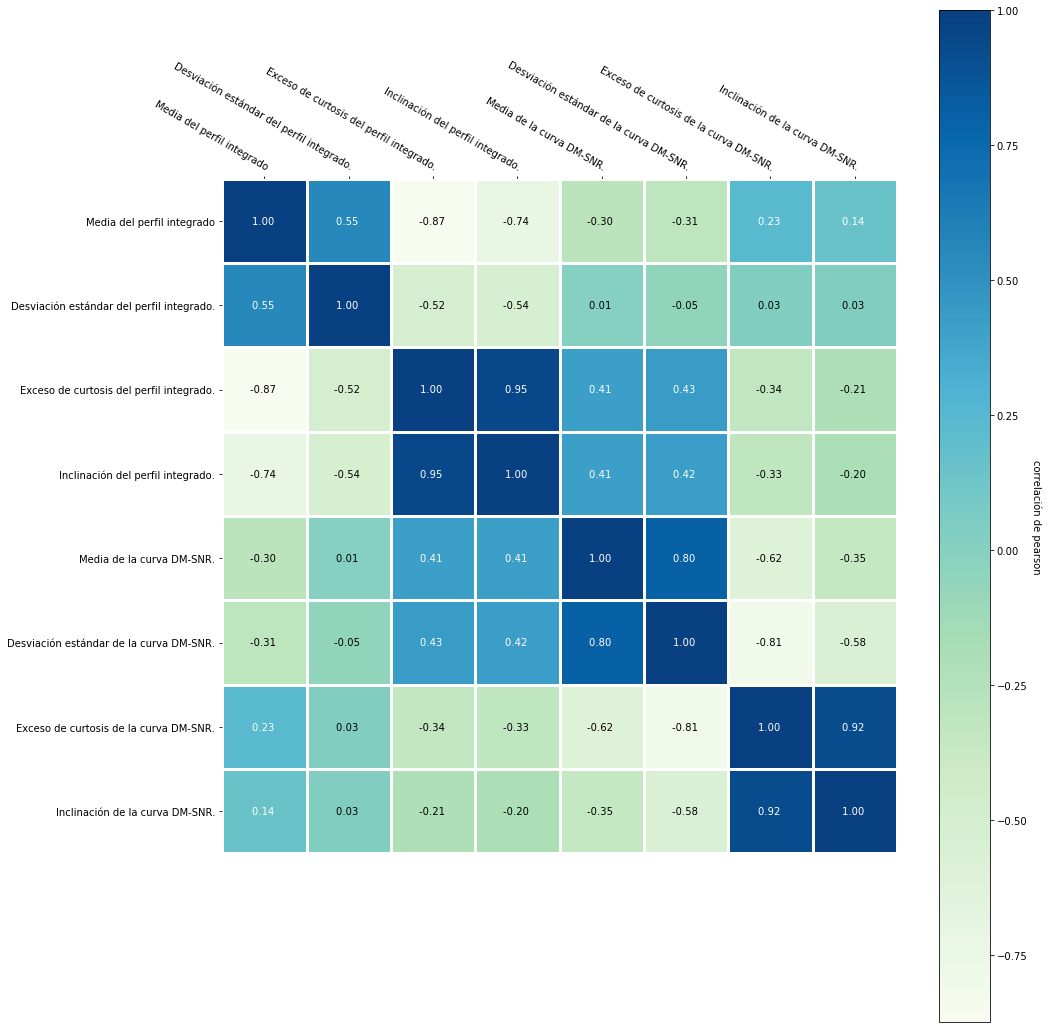

In [14]:
from mpl_heatmap import heatmap, annotate_heatmap

fig, ax = plt.subplots(figsize=(15, 15))

im, cbar = heatmap(corr_matrix, dic_trad.values(), dic_trad.values(), ax=ax,
                   cmap="GnBu", cbarlabel="correlación de pearson")
texts = annotate_heatmap(im, valfmt="{x:.2f} ",textcolors=["black","white"])

fig.tight_layout()
plt.show()

<a id='preprocessing'></a>

## Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X_raw = df_matrix.values
y = df['is_pulsar'].tolist()

In [17]:
scaler =StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [18]:
print('El promedio de X es','%.f' %np.mean(X))
print('La desviación estandar de X es','%.f'%np.std(X))


El promedio de X es 0
La desviación estandar de X es 1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42) 

<a id='logistic'></a>

## Regresión Logística

Utiliza la función `cross_validate` con el estimador `logistic` para realizar una estimación del _score_

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [21]:
logistic = LogisticRegression()
logistic_cv = cross_validate(logistic,X_train, y_train, cv=10,scoring='precision')

In [22]:
print(f'Logistic Regression Cross Validation precision score: {np.mean(logistic_cv["test_score"]):.6f} +/- {np.std(logistic_cv["test_score"]):.2f}')

Logistic Regression Cross Validation precision score: 0.940692 +/- 0.02


<a id='knn'></a>

In [23]:
logistic.fit(X_train,y_train);

## K Nearest Neighbours

Utiliza `GridSearchCV` para encontrar el mejor valor de `n_neighbors`. Luego, con el mejor _estimator_ de `knn` realiza la validación cruzada para obtener el intervalo de confianza del _score_.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
parameters = np.arange(1,20)
digits_gscv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': parameters},scoring="precision").fit(X_train,y_train)

In [26]:
digits_gscv.best_params_['n_neighbors']

2

In [27]:
knn = KNeighborsClassifier(n_neighbors=digits_gscv.best_params_['n_neighbors'])
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [28]:
knn_cv = cross_validate(knn,X_train,y_train,cv=10,scoring='precision')

In [29]:
print(f'KNN Cross Validation precision score: {np.mean(knn_cv["test_score"]):.2f} +/- {np.std(knn_cv["test_score"]):.2f} with train data.')

KNN Cross Validation precision score: 0.95 +/- 0.02 with train data.


<a id='free_style'></a>

## RidgeClassifier()

* Escoge un modelo de clasificación de [aquí](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) que por lo menos tenga un hiperparámetro, por ejemplo, [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) tiene el parámetro de regularización `C`.
* Explica en uno o dos párrafos en qué consiste el algoritmo/modelo.
* Al igual que KNN, encuentra el/los mejores valores para los hiperparámetros.
* Con el mejor estimador realiza _Cross Validation_ con los datos de entrenamiento.
* Calcula el intervalo de confianza de _precision_.

### **RidgeClassifier** 

Es un modelo de regresión lineal que al tener muchas variables discrimina cuales tiene que usar y cuales no, este modelo combina un modelo de regresión con un procedimiento de contracción de algunos parámetros hacia cero, utilizando una restricción sobre los coeficiente de la regresión, esto lo hace añadiendo su norma _L1_ a la función de costo

El parametro alpha es la constante que multiplica el termino de _L1_ y por lo tanto controla el grado de dispersión de los coeficientes estimados.

In [30]:
from sklearn.linear_model import RidgeClassifier

In [31]:
my_model = RidgeClassifier()
params = {'alpha': [0.000001,0.00000001,0.0001,0.001,0.001,0.01,0.1,1,10,100]}
alpha = GridSearchCV(my_model, params, scoring='precision',cv=10,).fit(X_train,y_train)
alpha.best_params_['alpha']

100

In [32]:
RdC=RidgeClassifier(alpha.best_params_['alpha'])
RdC.fit(X_train,y_train)
my_model_cv = cross_validate(RdC,X_train,y_train,cv=10,scoring='precision')

In [33]:
print(f'MY MODEL Cross Validation precision score: {np.mean(my_model_cv["test_score"]):.2f} +/- {np.std(my_model_cv["test_score"]):.2f} with train data.')

MY MODEL Cross Validation precision score: 0.97 +/- 0.02 with train data.


<a id='model_selection'></a>

## Selección de Modelo

* Compara la _precision_ entre cada uno de los modelos.
* Grafica la matriz de confusión para cada uno de los modelos.
* Calcula un intervalo de confianza del tiempo utilizado en el ajuste de cada modelo. Ver documentación de `cross_validate`.
* Gráficos o reportes adicionales.


### **Precisión entre modelos**

In [34]:
from sklearn.metrics import precision_score, classification_report

In [35]:
print(f'Logistic Regression test precision score: {precision_score(y_test,logistic.predict(X_test)):.5f}')

Logistic Regression test precision score: 0.93571


In [36]:
print(f'KNN test precision score: {precision_score(y_test,knn.predict(X_test)):.5f}')

KNN test precision score: 0.94964


In [37]:
print(f'MY MODEL test precision score: {precision_score(y_test,RdC.predict(X_test)):.2f}')

MY MODEL test precision score: 0.98


### **Matrices de confusión**

In [38]:
from sklearn.metrics import plot_confusion_matrix

<a id='conclusions'></a>

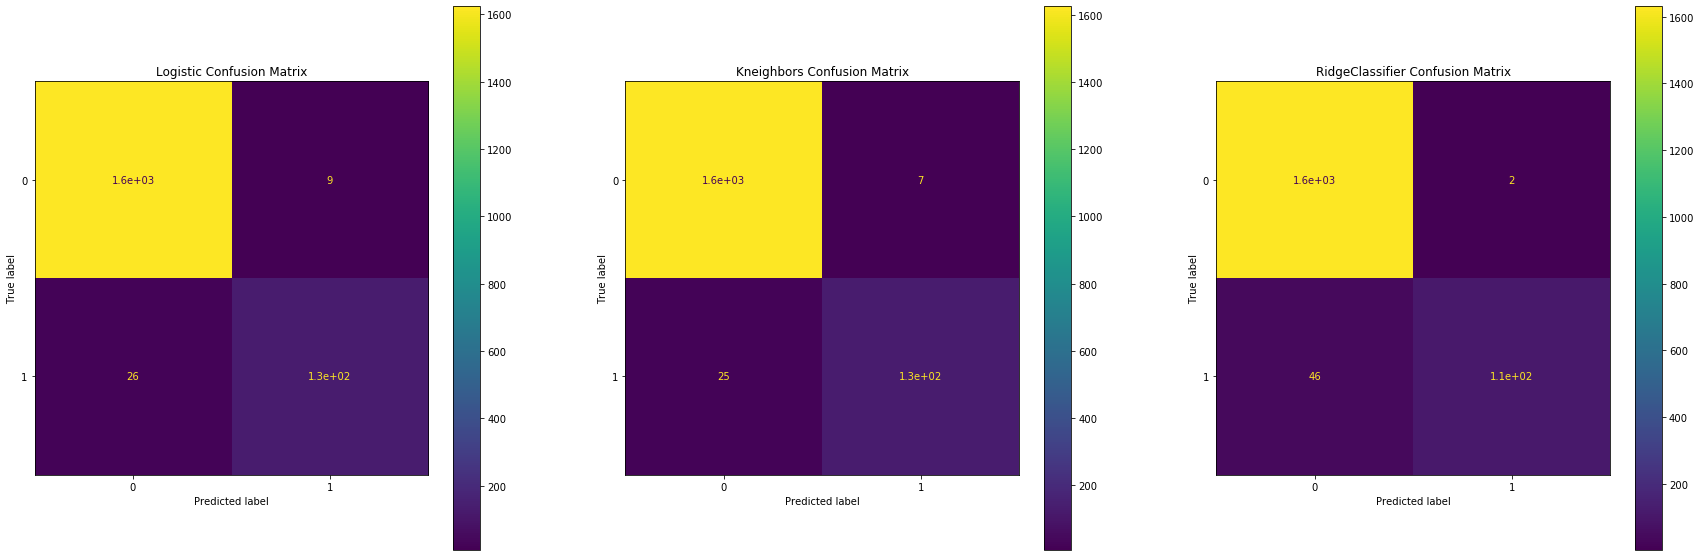

In [39]:
fig,(ax1, ax2,ax3)= plt.subplots(1,3,figsize=(30,10))

plot_confusion_matrix(logistic, X_test, y_test,ax=ax1)
ax1.set_title('Logistic Confusion Matrix')

plot_confusion_matrix(knn, X_test, y_test,ax=ax2)
ax2.set_title('Kneighbors Confusion Matrix')

plot_confusion_matrix(RdC, X_test, y_test,ax=ax3)
ax3.set_title('RidgeClassifier Confusion Matrix')


plt.show()

### **Intervalos de Confianza del Tiempo de Ajuste**

In [40]:
print(f'Confidence interval of Logistic Regression fit time : {np.mean(logistic_cv["fit_time"]):.2f} +/- {np.std(my_model_cv["fit_time"]):.2f} ')

Confidence interval of Logistic Regression fit time : 0.05 +/- 0.00 


In [41]:
print(f'Confidence interval of KNegihbors fit time: {np.mean(knn_cv["fit_time"]):.2f} +/- {np.mean(knn_cv["fit_time"]):.2f} ')


Confidence interval of KNegihbors fit time: 0.02 +/- 0.02 


In [42]:
print(f'Confidence interval of RidgeClassifier fit time: {np.mean(my_model_cv["fit_time"]):.2f} +/- {np.std(my_model_cv["fit_time"]):.2f} ')

Confidence interval of RidgeClassifier fit time: 0.02 +/- 0.00 


### **Graficos y Reportes Adicionales**

**Primeras observaciones:**
- Se tiene que el mejor precision score es del modelo RidgeClassifier, segudo por KNeighbors y Logistic Regression, los cuales coinciden relativamente con los intervaos de confianza calculados en la parte anterior.
- De los 3 confusion plot se puede ver como el modelo que tiene más malas predicciones es el modelo de RidgeClassifier con 49 malas prediccionios seguido del Logistic Regression con 35 fallos y por ultimo con KNeighbors con 32 fallos. 
- Del Intervalo de confianza del tiempo se tiene que el modelo que se ajusta mas reapido es RidgeClassifier sehuido KNeighbors y Logistic Regression.

Ahora hay que analizar el porque el modelo que tiene mas score es que el tiene mas fallos en el modelo.
¿Que nos dice la documentación de precision_score? [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)

precision_score por defecto utiliza average='binary' la cual se obtiene mediante la formula **tp/(tp+fp)**, donde **tp:true positive**, **fp:false positive**, podemos ver de [1] y [2] que **tp** corresponde a la posicion [1,1] de la matriz de confución , **fp** corresponde a la posición [1,2] de la matriz de confusión, **tn=true negative** corresponde a la posición [2,1] de matriz de confusión y **fn:false negative** corresponde a la posición [2,1] de la matriz de confusión.

Dada la definición de precisión score con average='binary' es logico que los resultados de estos no tengan relación con los fallos totales del modelo de predicción, debido a que si nos fijamos en los falos negativos podemos ver que el RidgeClassifier falla altamente en este con 44 casos versus los 26 y 25  falsos negativos de Logistic Regression  y Kneighbors correspondiemente.

Ahora cabe recabar que habra que se rescatara los valores de *VPN* (valor predictivo negativo)[2] para aalizar el score con u average=**tn/(tn+fn)** y del acurracy score **(tn+tp)/(tn+tp+fp+fn)**



**References** *(obs:ambas referencias son de wikipedia pero es  el link adjunto en la documentación)*:

[1]   https://en.wikipedia.org/w/index.php?title=Information_retrieval&oldid=793358396#Average_precision

[2]  https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values)https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values

#### **Negative Predictive Value** TN/(TN+FN)

In [43]:
#Basta Con intercambiar las filas
print(f'MY MODEL test precision score: {precision_score(logistic.predict(X_test),y_test):.4f}')
print(f'KNN test precision score: {precision_score(knn.predict(X_test),y_test):.4f}')
print(f'MY MODEL test precision score: {precision_score(RdC.predict(X_test),y_test):.4f}')

MY MODEL test precision score: 0.8344
KNN test precision score: 0.8408
MY MODEL test precision score: 0.7070


#### **Acurracy** (TN+TN)/(TN+FN+TP+FP)

In [44]:
from sklearn.metrics import accuracy_score
print(f'MY MODEL test precision score: {accuracy_score(logistic.predict(X_test),y_test):.4f}')
print(f'KNN test precision score: {accuracy_score(knn.predict(X_test),y_test):.4f}')
print(f'MY MODEL test precision score: {accuracy_score(RdC.predict(X_test),y_test):.4f}')

MY MODEL test precision score: 0.9804
KNN test precision score: 0.9821
MY MODEL test precision score: 0.9732


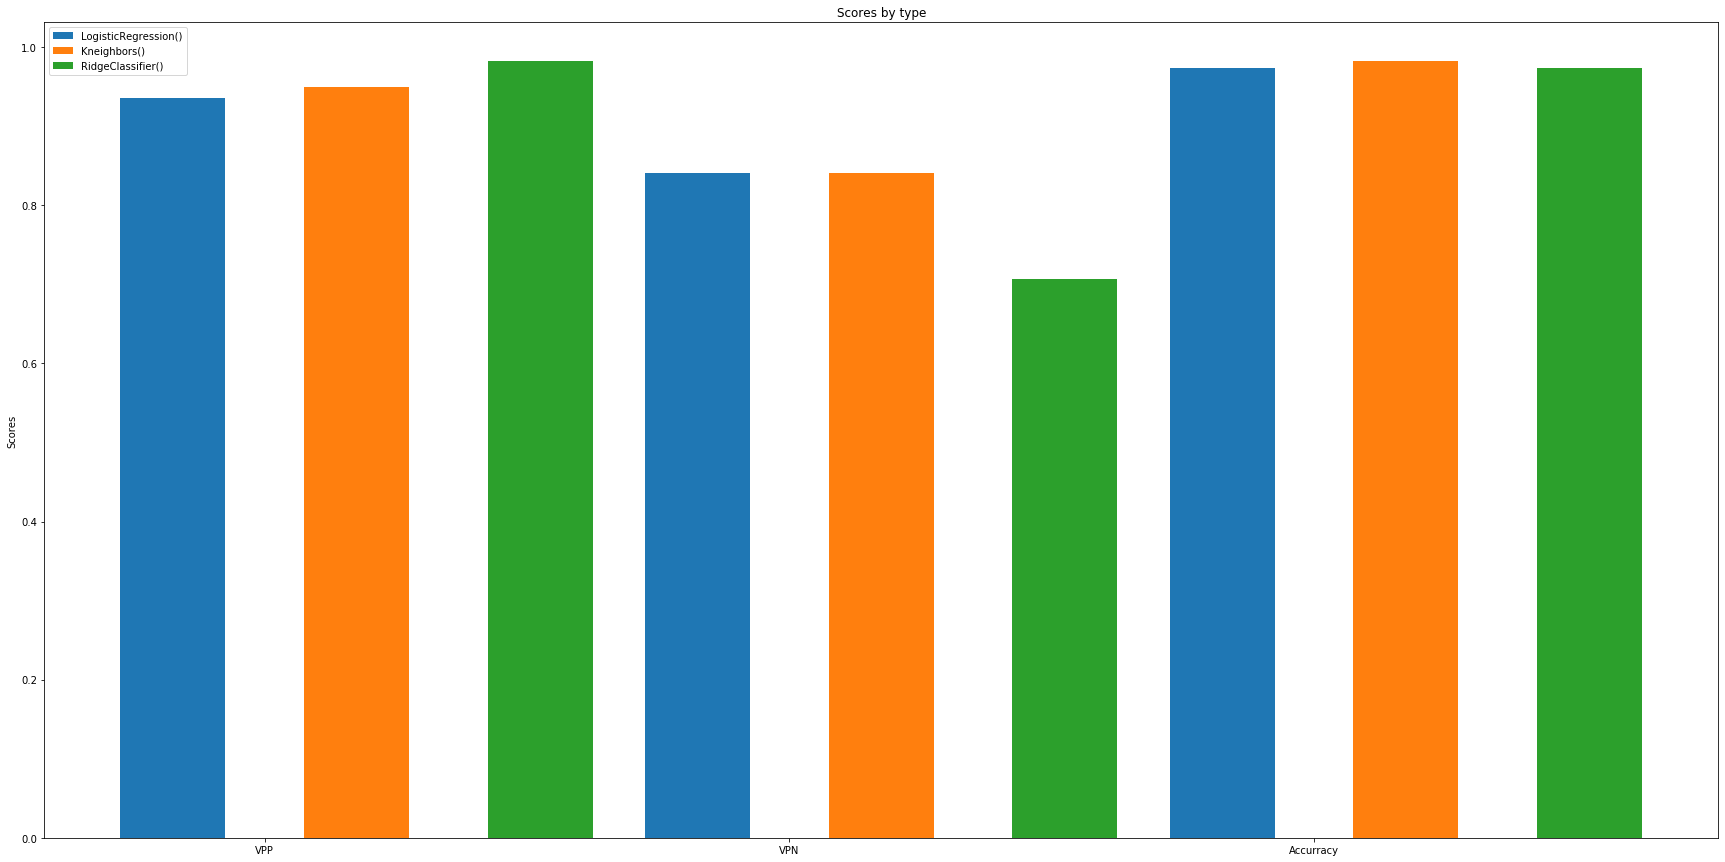

In [45]:
nx,ny=1,3
names=('VPP','VPN','Accurracy')
list_logistic=(precision_score(y_test,logistic.predict(X_test)),precision_score(knn.predict(X_test),y_test),accuracy_score(y_test,RdC.predict(X_test)))
list_knn=(precision_score(y_test,knn.predict(X_test)),precision_score(knn.predict(X_test),y_test),accuracy_score(knn.predict(X_test),y_test))
list_RdC=(precision_score(y_test,RdC.predict(X_test)),precision_score(RdC.predict(X_test),y_test),accuracy_score(RdC.predict(X_test),y_test))
x = np.arange(len(names)) 

fig, ax = plt.subplots(figsize=(30,15))
rects1 = ax.bar(x - 0.35/2, list_logistic, 0.2, label='LogisticRegression()')
rects2 = ax.bar(x + 0.35/2, list_knn, 0.2, label='Kneighbors()')
rects3 = ax.bar(x +3*0.35/2, list_RdC, 0.2, label='RidgeClassifier()')
ax.set_ylabel('Scores')
ax.set_title('Scores by type')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

* En este grafico se puede ver el compartamiento de los scores para las metricas VPP, VPN y accurracy para los distintos modelos

## Conclusiones

* ¿Cuál modelo tiene mejor _precision_?


**R:** El modelo con mejor positive prediction value (precision_score(...,average='binary')) es RidgeClassifier(), el modelo con mejor acurracy y mejor VPN es Kneighbors()

* ¿Cuál modelo demora menos tiempo en ajustarse?

**R:** El modelo que se demora menos tiempo en ajustarse el RidgeCLassifier() seguido de Kneighbors()

* ¿Qué modelo escoges?

**R:** Escogo el modelo de Kneighbors() ya que este me entrega menos fallos (se puede ver en el acurracy score además de visualmente en la matriz de confusión) y además el intervalo de tiempo de entrenamiento no tiene gran distinción con RidgeClassifier()

* ¿Por qué utilizar _precision_ y no otro score?

**R:** precision_score es muy util cuando se debe priorizar que no hayan ciertos fallos, es decir, si nos interesa que los **fp** sean minimos, ya que esta variable tiene un alto costo si predice de forma incorrecta, entonces precision_score es el adecuado, por otra parte si *VNP* tiene un comportamiento similar al comportamiento de *VPP* entonces solo se necesita considerar el precision_score, ya que no es necesario la evaluación de las demas metricas.

Aunque estoy interesada que se minimice los **fp**, en mi caso los **fn** del RidgeClassifier es relativamente alto en lcomparación a los **fn** de los demas modelos, por lo que comparando las demas metricas VPN y acurracy  y considerano el tiempo de ejecución es mas razonable elegir Kneighbors()

**Visualización**

In [46]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

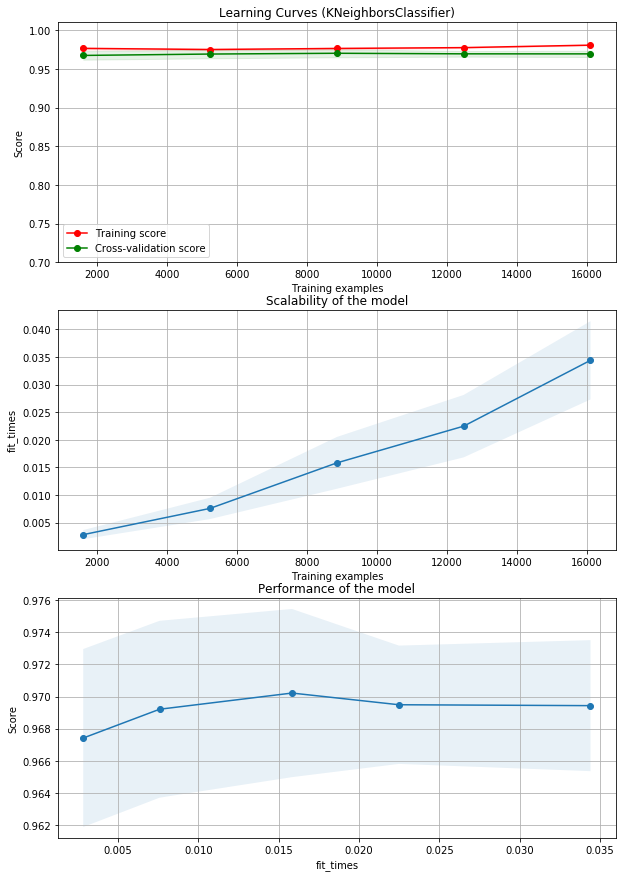

In [47]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

X, y = X_raw,y

title = "Learning Curves (KNeighborsClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
estimator = digits_gscv.best_estimator_.fit(X_train,y_train)
plot_learning_curve(estimator, title, X, y,axes=axes, ylim=(0.7, 1.01),
                    cv=10, n_jobs=4)


plt.show()

**Trabajos futuros**

Lo que me llamo más la atención es utilizar el precision_score y en que tipo de modelos es considerablemente mejor usarlo, vi el ejemplo de donde se utilizar un set de datos de pacientes con cancer al intestino (que estan confirmados mediante endoscopia) y se le realiza un estudio de cancer a traves de muestras fecales, en estos casos es donde toman mucha relevancia los **fp** y **fn**, un **fp** le dice a un paciente sano que tiene cancer, lo cuál en mi perspectica es mucho menos grave que hacerle un examen auna persona que padece cancer y este aparezca negativo **fn**, por lo que en este caso seria mejor evaluar un VPN intercambiando las filas en el precision_score, seria intereseante evaluar modelos predictivos de tal relevancia con una datasets mucho mas grande

**Dificultades**

Lo que mas me costo fue la elección del modelo por la definición que tomaba el score, entre la amtriz de confusión y los resultados entregados veia una contrariedad cuando se trataba del RidgeClassifier,al final respecto a todas las variables escogi el Kneidhbors()